In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karaagroaiprojects/cadi-ai")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cadi-ai


In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from shutil import copy2
import tqdm
import torch

In [4]:
base_dir = "/kaggle/input/cadi-ai/Data"

# Define paths for training, validation, and testing datasets
train_dir = os.path.join(base_dir, "train/train")
val_dir = os.path.join(base_dir, "val/val")
test_dir = os.path.join(base_dir, "test/test")

In [5]:
def explore_dataset(dataset_dir):
    images_dir = os.path.join(dataset_dir, "images")
    labels_dir = os.path.join(dataset_dir, "labels")
    
    num_images = len(os.listdir(images_dir))
    num_labels = len(os.listdir(labels_dir))
    
    print(f"Dataset: {dataset_dir}")
    print(f"  Number of images: {num_images}")
    print(f"  Number of labels: {num_labels}\n")

print("Exploring dataset structure...")
explore_dataset(train_dir)
explore_dataset(val_dir)
explore_dataset(test_dir)

Exploring dataset structure...
Dataset: /kaggle/input/cadi-ai/Data/train/train
  Number of images: 3788
  Number of labels: 3788

Dataset: /kaggle/input/cadi-ai/Data/val/val
  Number of images: 710
  Number of labels: 710

Dataset: /kaggle/input/cadi-ai/Data/test/test
  Number of images: 238
  Number of labels: 238



Visualizing a sample image with bounding boxes...


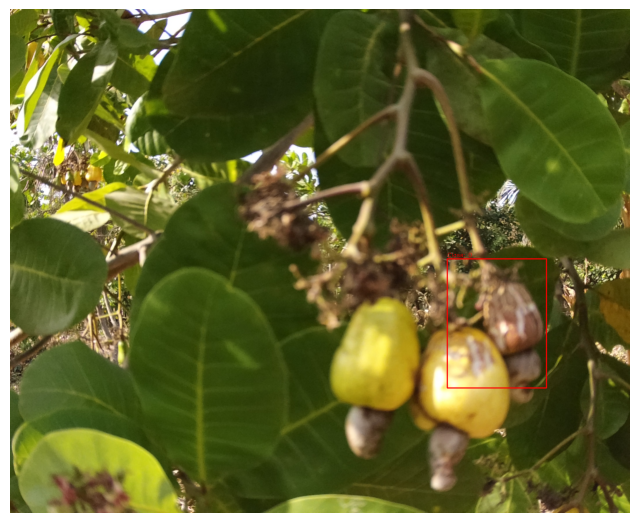

In [6]:
def plot_image_with_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    with open(label_path, 'r') as f:
        labels = f.readlines()
    
    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.split())
        img_h, img_w = img.shape[:2]
        x1 = int((x_center - width / 2) * img_w)
        y1 = int((y_center - height / 2) * img_h)
        x2 = int((x_center + width / 2) * img_w)
        y2 = int((y_center + height / 2) * img_h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, f"Class: {int(class_id)}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

sample_image = glob(os.path.join(train_dir, "images", "*.jpg"))[0]
sample_label = sample_image.replace("images", "labels").replace(".jpg", ".txt")
print("Visualizing a sample image with bounding boxes...")
plot_image_with_boxes(sample_image, sample_label)

In [13]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [15]:
# # Directories
# image_dir = os.path.join(train_dir, "images")
# output_dir = "/kaggle/working/filtered/images"
# os.makedirs(output_dir, exist_ok=True)

# # Function to detect blur
# def is_blurry(image_path, threshold=100):
#     """Detects if an image is blurry based on the variance of the Laplacian."""
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     variance = cv2.Laplacian(image, cv2.CV_64F).var()
#     return variance < threshold

# # Load YOLOv5 model
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# # Filter images
# for img_path in glob(os.path.join(image_dir, "*.jpg")):
#     if is_blurry(img_path):
#         print(f"Skipping blurry image: {img_path}")
#         continue
    
#     # Use the updated autocast syntax
#     with torch.amp.autocast('cuda'):  # Updated syntax
#         results = model(img_path)

#     detections = results.pred[0]

#     # Check if any detected object is a human (class 0 in YOLOv5)
#     has_human = any(int(det[-1]) == 0 for det in detections)
#     if has_human:
#         print(f"Skipping image with human figures: {img_path}")
#         continue
    
#     # Save the filtered image to the output directory
#     cv2.imwrite(os.path.join(output_dir, os.path.basename(img_path)), cv2.imread(img_path))

# print("Image preprocessing completed!")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-6 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Skipping image with human figures: /kaggle/input/cadi-ai/Data/train/train/images/3532.jpg
Skipping image with human figures: /kaggle/input/cadi-ai/Data/train/train/images/355.jpg
Skipping image with human figures: /kaggle/input/cadi-ai/Data/train/train/images/3574.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2363.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2486.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2087.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2655.jpg
Skipping image with human figures: /kaggle/input/cadi-ai/Data/train/train/images/359.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2642.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2616.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2376.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2488.jpg
Skipping image wit

In [18]:
# Directories for images and annotations
image_dir = os.path.join(train_dir, "images")
label_dir = os.path.join(train_dir, "labels")

# Directories for filtered outputs
filtered_image_dir = "/kaggle/working/filtered/images"
filtered_label_dir = "/kaggle/working/filtered/labels"
os.makedirs(filtered_image_dir, exist_ok=True)
os.makedirs(filtered_label_dir, exist_ok=True)

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Function to process and filter
for img_path in glob(os.path.join(image_dir, "*.jpg")):
    # Check if the image is blurry
    if is_blurry(img_path):
        print(f"Skipping blurry image: {img_path}")
        continue

    # Run YOLO model to detect objects
    results = model(img_path)
    detections = results.pred[0]
    
    # Skip images with humans detected
    has_human = any(int(det[-1]) == 0 for det in detections)  # Assuming COCO class 0 = human
    if has_human:
        print(f"Skipping image with human figures: {img_path}")
        continue

    # Save the filtered image
    filtered_img_path = os.path.join(filtered_image_dir, os.path.basename(img_path))
    cv2.imwrite(filtered_img_path, cv2.imread(img_path))
    
    # Save corresponding annotation
    label_path = os.path.join(label_dir, os.path.basename(img_path).replace(".jpg", ".txt"))
    filtered_label_path = os.path.join(filtered_label_dir, os.path.basename(label_path))
    
    if os.path.exists(label_path):
        copy2(label_path, filtered_label_path)

print("Filtered images and annotations saved successfully!")

Skipping image with human figures: /kaggle/input/cadi-ai/Data/train/train/images/3532.jpg
Skipping image with human figures: /kaggle/input/cadi-ai/Data/train/train/images/355.jpg
Skipping image with human figures: /kaggle/input/cadi-ai/Data/train/train/images/3574.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2363.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2486.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2087.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2655.jpg
Skipping image with human figures: /kaggle/input/cadi-ai/Data/train/train/images/359.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2642.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2616.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2376.jpg
Skipping blurry image: /kaggle/input/cadi-ai/Data/train/train/images/2488.jpg
Skipping image wit

In [19]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.68 MiB | 27.35 MiB/s, done.
Resolving deltas: 100% (11714/11714), done.
/kaggle/working/yolov5


In [30]:
filtered_image_count = len(glob(os.path.join("/kaggle/working/filtered/images", "*.*")))
filtered_label_count = len(glob(os.path.join("/kaggle/working/filtered/labels", "*.txt")))

print(f"Number of filtered images : {filtered_image_count}")
print(f"Number of filtered labels : {filtered_label_count}")

Number of filtered images : 2664
Number of filtered labels : 2664


In [21]:
# Python code to create data.yaml file

yaml_content = """
# data.yaml for CADI AI - Cashew Disease Identification
train: /kaggle/working/filtered/images
val: /kaggle/input/cadi-ai/Data/val/val/images
test: /kaggle/input/cadi-ai/Data/test/test/images

nc: 3
names: ['Disease', 'Abiotic', 'Insect']
"""

# Path where you want to save the data.yaml file
yaml_file_path = '/kaggle/working/yolov5/data.yaml'

# Write the content to the file
with open(yaml_file_path, 'w') as file:
    file.write(yaml_content)

print(f"data.yaml file has been created at {yaml_file_path}")

data.yaml file has been created at /kaggle/working/yolov5/data.yaml


In [22]:
import torch
if torch.cuda.is_available():
    print("GPU is available.")
else:
    print("GPU is not available. Training will fall back to CPU.")

GPU is available.


In [24]:
!python /kaggle/working/yolov5/train.py --img 640 --batch 16 --epochs 50 --data /kaggle/working/yolov5/data.yaml --weights yolov5s.pt --device 0 --patience 5

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=5, 

In [33]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 28.73 MiB/s, done.
Resolving deltas: 100% (11719/11719), done.
/kaggle/working/yolov5/yolov5


In [42]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 481), started 0:03:38 ago. (Use '!kill 481' to kill it.)

In [41]:
%reload_ext tensorboard

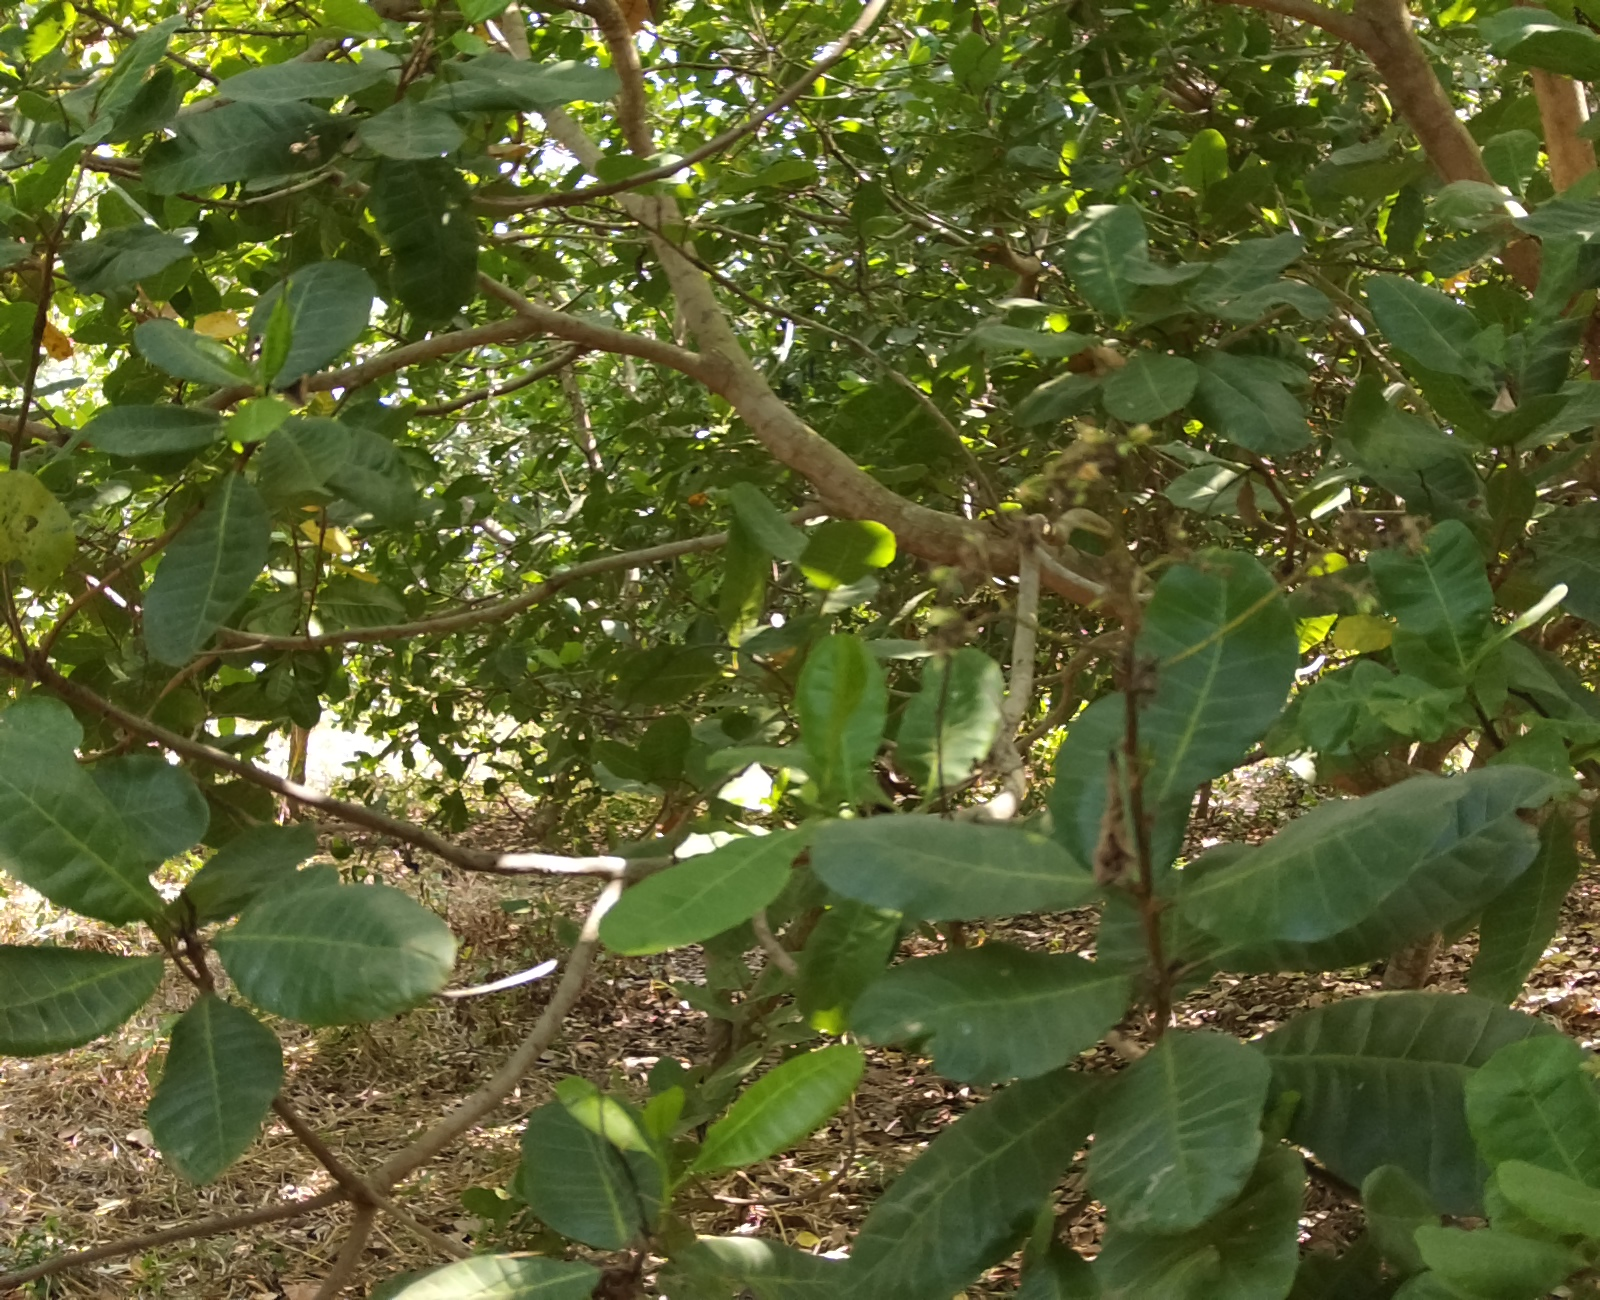

In [48]:
from IPython.display import Image
Image(filename = '/kaggle/input/cadi-ai/Data/test/test/images/1040.jpg', width = 416)

In [46]:
!python detect.py --source /kaggle/input/cadi-ai/Data/test/test/images/1040.jpg --weights /kaggle/working/yolov5/runs/train/exp2/weights/best.pt

detect: weights=['/kaggle/working/yolov5/runs/train/exp2/weights/best.pt'], source=/kaggle/input/cadi-ai/Data/test/test/images/1040.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/input/cadi-ai/Data/test/test/images/1040.jpg: 544x640 4 Abiotics, 2 Insects, 28.3ms
Speed: 0.6ms pre-process, 28.3ms inference, 158.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


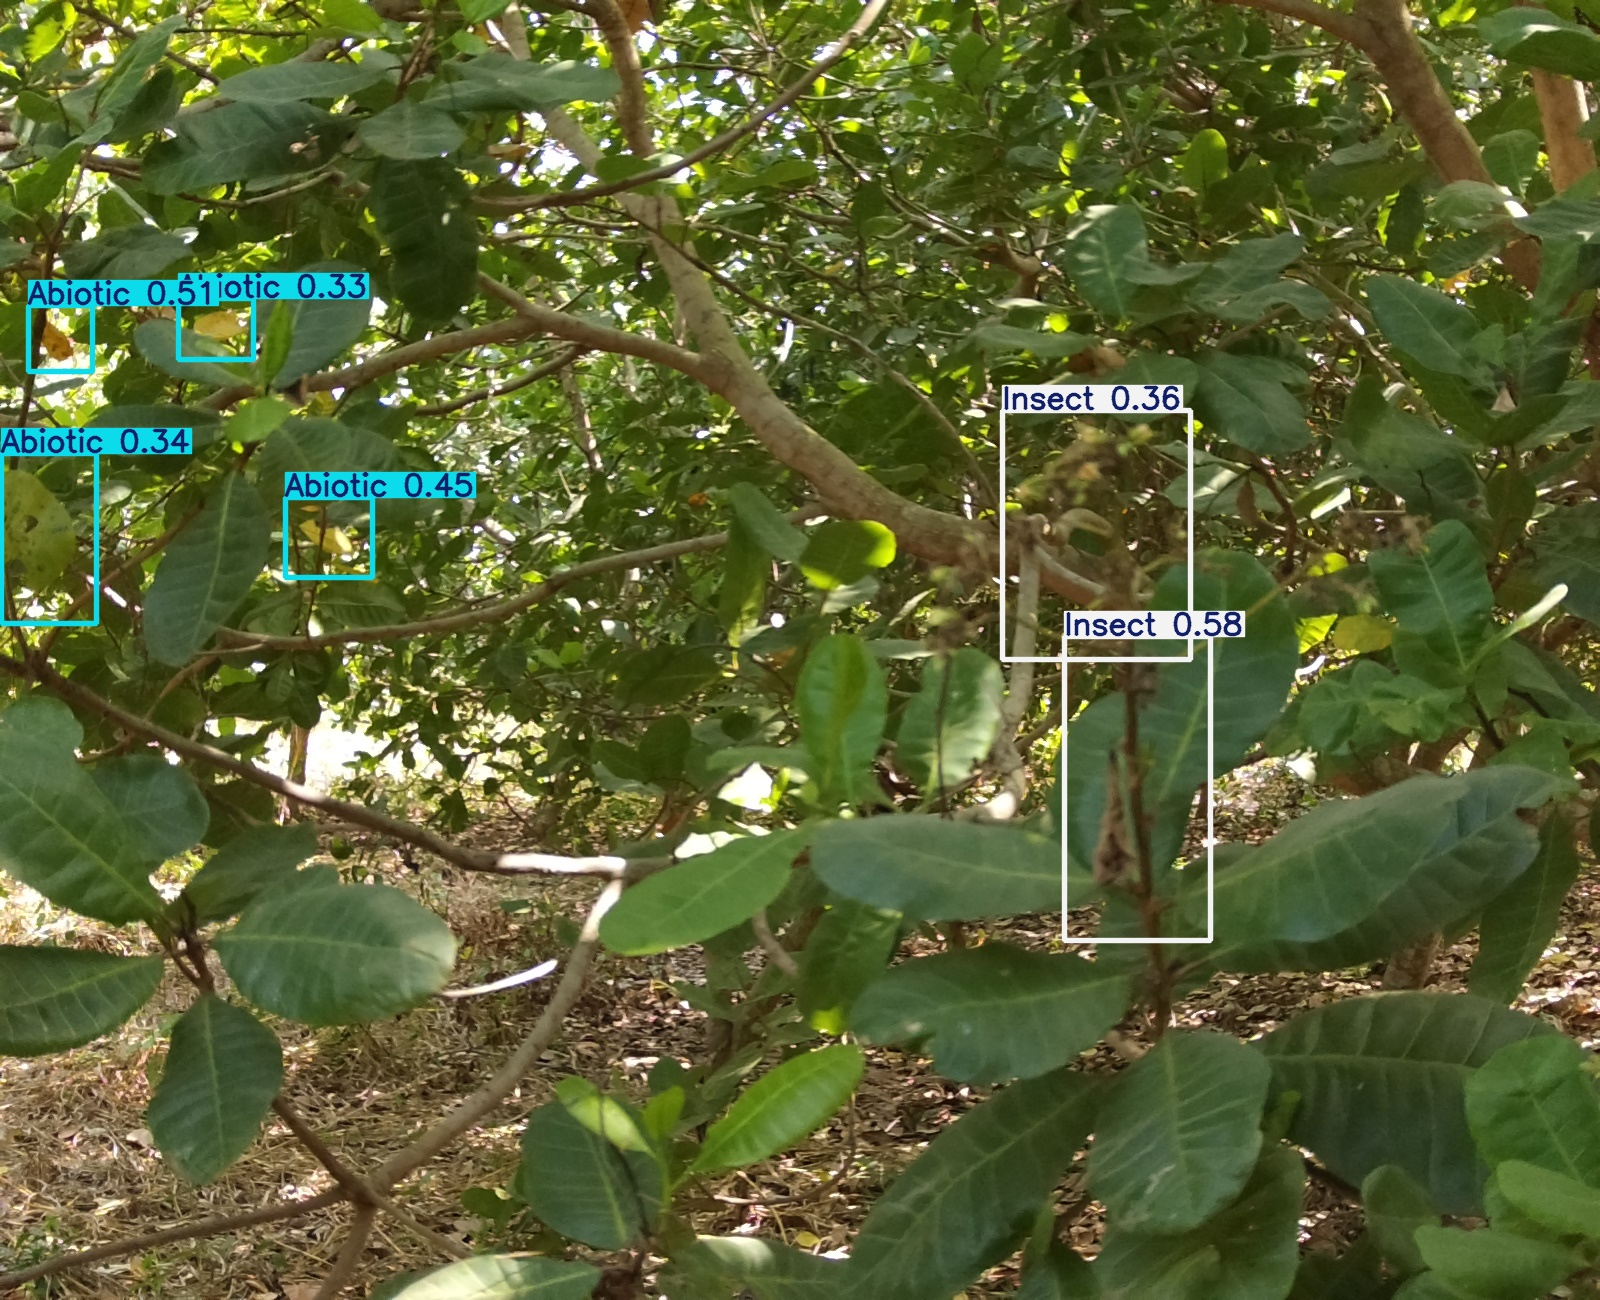

In [49]:
Image(filename = 'runs/detect/exp4/1040.jpg', width = 416)

In [ ]:
!python detect.py --source /kaggle/input/cadi-ai/Data/test/test/images --weights /kaggle/working/yolov5/runs/train/exp2/weights/best.pt

In [50]:
!python detect.py \
  --source /kaggle/input/cadi-ai/Data/test/test/images \
  --weights /kaggle/working/yolov5/runs/train/exp2/weights/best.pt \
  --img-size 640 \
  --conf-thres 0.25 \
  --iou-thres 0.45 \
  --save-txt \
  --save-conf


detect: weights=['/kaggle/working/yolov5/runs/train/exp2/weights/best.pt'], source=/kaggle/input/cadi-ai/Data/test/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/238 /kaggle/input/cadi-ai/Data/test/test/images/1004.jpg: 544x640 6 Abiotics, 1 Insect, 30.0ms
image 2/238 /kaggle/input/cadi-ai/Data/test/test/images/1026.jpg: 544x640 4 Abiotics, 11.1ms
image 3/238 /kaggle/input/cadi-ai/Data/test/test/images/1040.jpg: 544x640 4 Ab

In [52]:
!python val.py \
  --weights /kaggle/working/yolov5/runs/train/exp2/weights/best.pt \
  --data /kaggle/working/yolov5/data.yaml \
  --img-size 640 \
  --task test

val: data=/kaggle/working/yolov5/data.yaml, weights=['/kaggle/working/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /kaggle/input/cadi-ai/Data/test/test/labels... 238 images, 0 back
test: WARNING ⚠️ /kaggle/input/cadi-ai/Data/test/test/images/797.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0057]
test: WARNING ⚠️ Cache directory /kaggle/input/cadi-ai/Data/test/test is not writeable: [Errno 30] Read-only file system: '/kaggle/input/cadi-ai/Data/test/test/labels.cache.npy'
           

In [55]:
print(model)

{'epoch': -1, 'best_fitness': None, 'model': DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3(
      (cv1): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
  